<a href="https://colab.research.google.com/github/divyanshuraj6815/eva/blob/master/Project%201/Assignment_7B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, Input, DepthwiseConv2D, Concatenate
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import layers, models

In [32]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


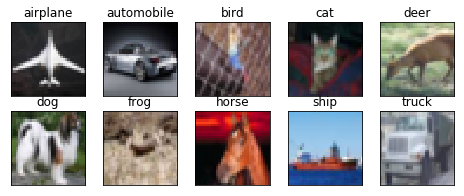

In [33]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
cardinality = 32


In [37]:
#call heavenly Gods
from keras import layers

#define global parameters
img_width = 32
img_height = 32
img_channels = 3

def assignment_7B (x):
  
  def add_common_layers (y):
    y = layers.BatchNormalization ()(y)
    y = layers.Activation ('relu')(y)
    y = layers.Dropout (0.1)(y)
    return y
  
  def concat (y):
    y = layers.concatenate (y)
    y = add_common_layers (y)
    return y
  
  def space_to_depth (y, input_shape, output_shape):
    no_of_groups = int (input_shape / output_shape)
    counter = int (input_shape / no_of_groups)
    
    n = list ()
    groups = []
    for i in range (0, input_shape + 1, counter):
      if i == 0:
        n.append (i)
      elif i == input_shape:
        n.append (i - 1)
      else:
        n.append (i - 1)
        n.append (i)
   
    z = []
    for i, x in enumerate (n):
      if i % 2 == 0:
        z.append ([n[i], n[i + 1]])
    #print (z) 
    groups = []
    for i in z:
      for j in z:
        group = layers.Lambda (lambda x: x[:, i[0]:i[1]+1, j[0]:j[1]+1, :])(y)
        #print (group.shape)
        groups.append (group)
    
    y = layers.concatenate (groups)
    return y

  def sep (y, channel_size, kernel_size, history, count):
    y = layers.SeparableConv2D(channel_size, (kernel_size, kernel_size), padding='same', use_bias=False, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform')(y)
    y = add_common_layers (y)
    #index = 0
    history.append (y)
    count += 1
    return (y, history, count)
  
  def conv (y, channel_size, kernel_size, history, count):
    y = layers.Conv2D (channel_size, (kernel_size, kernel_size), strides = (1, 1), padding = 'same')(y)
    y = add_common_layers (y)
    #index = 0
    history.append (y)
    count += 1
    return (y, history, count)
    
  def block_1 (y, history, count):
    #index = 0
    (y, history, count) = sep (y, 48, 5, history, count)
    #index = 1
    (y, history, count) = conv (y, 48, 5, history, count)
    #index = 2
    (y, history, count) = conv (y, 48, 5, history, count)
    #index = 3
    (y, history, count) = sep (concat ([y, history[0]]), 48, 5, history, count)
    
    return (concat ([y, history[0]]), history, count)

  def block_2 (y, history, count):
    #index = 5
    (y, history, count) = sep (y, 96, 3, history, count)
    #index = 6
    (y, history, count) = conv (concat ([y, 
                                         space_to_depth (history[0], 32, 16), 
                                         space_to_depth (history[3], 32, 16)]),
                                96, 
                                5, 
                                history, count)
    #index = 7
    (y, history, count) = sep (concat ([y, 
                                        space_to_depth (history[0], 32, 16), 
                                        space_to_depth (history[3], 32, 16), 
                                        history[5]]), 
                               96, 
                               3, 
                               history, count)
    #index = 8
    (y, history, count) = sep (concat ([y, 
                                        space_to_depth (history[0], 32, 16), 
                                        space_to_depth (history[2], 32, 16), 
                                        space_to_depth (history[3], 32, 16),
                                        history[5]]), 
                               96, 
                               5, 
                               history, count)
    
    return (concat ([y, 
                     space_to_depth (history[0], 32, 16), 
                     space_to_depth (history[3], 32, 16), 
                     history[5], 
                     history[7]]), 
            history, 
            count)

  def block_3 (y, history, count):
    #index = 10
    (y, history, count) = conv (concat ([y, 
                                         space_to_depth (history[6], 16, 8)]),
                                192, 
                                5, 
                                history, count)
    #index = 11
    (y, history, count) = sep (concat ([y, 
                                        space_to_depth (history[0], 32, 8), 
                                        space_to_depth (history[1], 32, 8), 
                                        space_to_depth (history[7], 16, 8)]), 
                               192, 
                               5, 
                               history, count)
    #index = 12
    (y, history, count) = conv (concat ([y, 
                                        space_to_depth (history[1], 32, 8), 
                                        space_to_depth (history[2], 32, 8),
                                        space_to_depth (history[5], 16, 8), 
                                        history[10]]), 
                               192, 
                               3, 
                               history, count)
    #index = 13
    (y, history, count) = sep (concat ([y, 
                                        space_to_depth (history[0], 32, 8), 
                                        space_to_depth (history[2], 32, 8),
                                        space_to_depth (history[3], 32, 8),
                                        space_to_depth (history[5], 16, 8),
                                        space_to_depth (history[7], 16, 8),
                                        history[11]]), 
                               192, 
                               5, 
                               history, count)
    
    return (concat ([y, 
                     space_to_depth (history[3], 32, 8), 
                     space_to_depth (history[7], 16, 8), 
                     history[11]]), 
            history, 
            count)
  
  history = []
  count = -1
  
  #part 1
  (x, history, count) = block_1 (x, history, count)
  print (count)
  #index = 4
  x = layers.MaxPooling2D((2, 2))(x)
  x = add_common_layers (x)
  history.append (x)
  count += 1
  
  #part 2
  (x, history, count) = block_2 (x, history, count)
  print (count)
  #index = 9
  x = layers.MaxPooling2D((2, 2))(x)
  x = add_common_layers (x)
  history.append (x)
  count += 1
  
  #part 3
  (x, history, count) = block_3 (x, history, count)
  print (count)
  #index = 14
  x = add_common_layers (x)
  x = layers.Conv2D(10, (8, 8), use_bias=False)(x)
  history.append (x)
  count += 1

  x = layers.Flatten()(x)
  x = layers.Activation ('softmax')(x)
  history.append (x)
  count += 1
  
  for i, element in enumerate (history):
    print (i, element.shape)
  return x

image_tensor = layers.Input(shape=(img_height, img_width, img_channels))
network_output = assignment_7B (image_tensor)
  
model = models.Model(inputs=[image_tensor], outputs=[network_output])
print(model.summary())
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


3
8
13
Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_89 (SeparableC (None, 32, 32, 48)   219         input_29[0][0]                   
__________________________________________________________________________________________________
batch_normalization_256 (BatchN (None, 32, 32, 48)   192         separable_conv2d_89[0][0]        
__________________________________________________________________________________________________
activation_270 (Activation)     (None, 32, 32, 48)   0           batch_normalization_256[0][0]    
____________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0901 06:17:35.583353 140518578526080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 382s 980ms/step - loss: 6.1335 - acc: 0.2946 - val_loss: 2.0341 - val_acc: 0.4102
Epoch 2/100
390/390 [==============================] - 354s 908ms/step - loss: 2.1395 - acc: 0.4586 - val_loss: 1.9465 - val_acc: 0.3840
Epoch 3/100
390/390 [==============================] - 354s 908ms/step - loss: 1.7681 - acc: 0.5238 - val_loss: 1.2878 - val_acc: 0.5442
Epoch 4/100
390/390 [==============================] - 354s 908ms/step - loss: 1.7419 - acc: 0.5549 - val_loss: 1.2804 - val_acc: 0.5613
Epoch 5/100
390/390 [==============================] - 354s 908ms/step - loss: 1.3882 - acc: 0.6031 - val_loss: 1.2586 - val_acc: 0.5655
Epoch 6/100
390/390 [==============================] - 354s 908ms/step - loss: 1.1971 - acc: 0.6350 - val_loss: 1.2921 - val_acc: 0.5837
Epoch 7/100
390/390 [==============================] - 354s 908ms/step - loss: 1.0740 - acc: 0.6661 - val_loss: 1.2428 - val_acc: 0.5709
Epoch 8/100
390/390 [====================

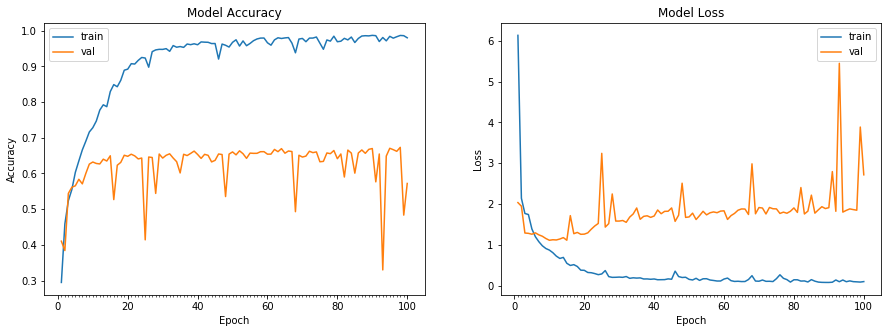

Accuracy on test data is: 57.20


In [38]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy

print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))